In [4]:
import sys, os
sys.path.insert(0, '/home/niell_lab/Documents/GitHub/FreelyMovingEphys/')
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from scipy.stats import linregress
from matplotlib.backends.backend_pdf import PdfPages
from projects.ephys.population import to_color
import cv2
import xarray as xr
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
%matplotlib inline
mpl.rcParams.update({'font.size':10})

In [5]:
%matplotlib inline

In [13]:
train_psth = np.load('/home/niell_lab/Desktop/train_psth.npy')
test_psth = np.load('/home/niell_lab/Desktop/test_psth.npy')
good_inds = np.load('/home/niell_lab/Desktop/good_inds.npy')

In [8]:
def get_direction_pref(left, right):
    evok_left = left[1000:1250]
    evok_right = right[1000:1250]
    
    ind = np.argmax([np.max(np.abs(evok_left)), np.max(np.abs(evok_right))])
    pref = ['left','right'][ind]
    nonpref = ('left' if pref=='right' else 'right')
    
    return pref, nonpref
    
def normalize_psth(psth, raw_pref=None, baseline_val=None):
    if raw_pref is None:
        raw_pref = psth.copy()
    if baseline_val is None:
        baseline_val = np.nanmean(psth[0:900].astype(float))
    norm_psth = (psth - baseline_val) / np.nanmax(raw_pref[1000:1250].astype(float))
    return norm_psth

In [10]:
train_psth.shape

(850, 2001)

In [11]:
test_psth.shape

(850, 2001)

In [14]:
n_cells = np.zeros([len(good_inds),2001])

In [ ]:
norm_train = np.zeros(n_cells)
for i, ind in enumerate(good_inds):
    norm_train[i,:] = train_psth[ind]
    norm_test[i,:] = test_psth[ind]
    

In [10]:
psth_bins = np.arange(-1,1.001,1/1000)

In [11]:
norm_train_psth = np.zeros(np.shape(train_psth))
for i in range(np.size(train_psth,0)):
    norm_train_psth[i,:] = normalize_psth(train_psth[i,:])
    
train_peakT = np.zeros(np.size(train_psth,0))
for i in range(np.size(train_psth,0)):
    train_peakT[i] = psth_bins[np.argmax(norm_train_psth[i,1035:1200])+1035]

In [12]:
norm_test_psth = np.zeros(np.shape(test_psth))
for i in range(np.size(test_psth,0)):
    norm_test_psth[i,:] = normalize_psth(test_psth[i,:])
    
test_peakT = np.zeros(np.size(test_psth,0))
for i in range(np.size(test_psth,0)):
    test_peakT[i] = psth_bins[np.argmax(norm_test_psth[i,1035:1200])+1035]

In [13]:
train_peakT = train_peakT[resp_inds]
norm_train_psth = norm_train_psth[resp_inds]

train_tseq_inds = np.argsort(train_peakT)

train_sort_tseq = norm_train_psth.copy()
train_sort_tseq = train_sort_tseq[train_tseq_inds]

In [14]:
test_peakT = test_peakT[resp_inds]
norm_test_psth = norm_test_psth[resp_inds]

test_tseq_inds = np.argsort(train_peakT) # sort using training data, NOT test data

test_sort_tseq = norm_test_psth.copy()
test_sort_tseq = test_sort_tseq[test_tseq_inds]

In [15]:
def plot_tempseq(panel, tseq, return_img=False, freev=None):
    panel.set_xlabel('msec')
    panel.set_ylim([np.size(tseq,0),0])
    vmin = -0.75; vmax = 0.75
    if freev is not None:
        vmin = -freev
        vmax = freev
    img = panel.imshow(tseq, cmap='coolwarm', vmin=vmin, vmax=vmax)
    panel.set_xlim([800,1400])
    panel.set_xticks(np.linspace(800,1400,4), labels=np.linspace(-200,400,4).astype(int))
    panel.vlines(1000, 0, np.size(tseq,0), color='k', linestyle='dashed', linewidth=1)
    if return_img:
        return img

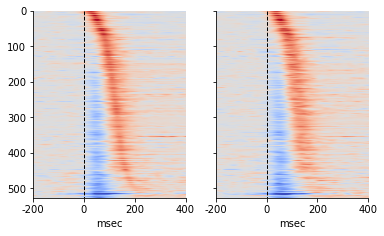

In [21]:
fig, [ax0,ax1] = plt.subplots(1,2,figsize=(6,7))

ax0_img = plot_tempseq(ax0, train_sort_tseq)
ax0.set_aspect(1.4)

ax1_img = plot_tempseq(ax1, test_sort_tseq)
ax1.set_aspect(1.4)
ax1.set_yticklabels([])

fig.savefig('/home/niell_lab/Desktop/crossval.pdf')

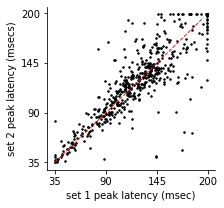

In [50]:
plt.figure(figsize=(3,3))
plt.plot(train_peakT, test_peakT, 'k.', markersize=3)
plt.xlabel('set 1 peak latency (msec)'); plt.ylabel('set 2 peak latency (msecs)')
plt.plot([0.035,.195], [0.035,.195], linestyle='dashed', color='tab:red', linewidth=1)
plt.xticks(np.linspace(0.035,.2,4), labels=np.linspace(35,200,4).astype(int))
plt.yticks(np.linspace(0.035,.2,4), labels=np.linspace(35,200,4).astype(int))
plt.savefig('/home/niell_lab/Desktop/crossval_peakT.pdf', pad_inches=3)

In [38]:
np.linspace(0.035,.2,4)

array([0.035, 0.09 , 0.145, 0.2  ])

In [34]:
np.linspace(35,200,4).astype(int)

array([ 35,  90, 145, 200])